<a href="https://colab.research.google.com/github/41123222009/20P03519-Tugas-Pt.11/blob/main/Tugas_Pertemuan_11_4112322009_Iksan_Nur_Afiah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Iksan nur Afiah\
NIM : 4112322009\
Prodi : Statistika Terapan dan Komputasi



---



In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

## **1. Eksplorasi Data**

### Load Dataset

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/41123222009/20P03519-Tugas-Pt.11/refs/heads/main/Credit%20Card%20Dataset.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Identifikasi Data

In [68]:
df_overview = []
columns = df
for i in columns :
    types = df[i].dtypes
    unique_data = df[i].nunique()
    missing_count=df[i].isnull().sum()
    value_count= df[i].isnull().count()
    missing_percentage= round(missing_count/value_count*100,2)
    duplicated= df.duplicated().sum()
    df_overview . append ([i , types , unique_data , missing_count, missing_percentage,duplicated])

df_info = pd.DataFrame (df_overview)
df_info.columns =['name of column' , 'types' ,'unique_data' , 'missing value', "missing percentage","duplicated"]

df_info

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,CUST_ID,object,8950,0,0.00,0
1,BALANCE,float64,8871,0,0.00,0
2,BALANCE_FREQUENCY,float64,43,0,0.00,0
3,PURCHASES,float64,6203,0,0.00,0
4,ONEOFF_PURCHASES,float64,4014,0,0.00,0
5,INSTALLMENTS_PURCHASES,float64,4452,0,0.00,0
6,CASH_ADVANCE,float64,4323,0,0.00,0
7,PURCHASES_FREQUENCY,float64,47,0,0.00,0
8,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.00,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.00,0


Dataset ini berisi data rangkuman perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir, dengan total 8.950 entri dan 18 kolom. Berikut adalah deskripsi setiap kolom:

1. `cust_id`: Identifikasi pemegang kartu kredit (Kategorikal)
2. `balance`: Jumlah saldo yang tersisa di akun untuk melakukan pembelian
3. `balance_frequency`: Frekuensi saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = jarang diperbarui)
4. `purchases`: Jumlah pembelian yang dilakukan dari akun
5. `oneoff_purchases`: Jumlah maksimum pembelian yang dilakukan dalam satu kali transaksi
6. `installments_purchases`: Jumlah pembelian yang dilakukan secara cicilan
7. `cash_advance`: Uang tunai yang diberikan di muka oleh pengguna
8. `purchases_frequency`: Frekuensi pembelian yang dilakukan, skor antara 0 dan 1 (1 = sering membeli, 0 = jarang membeli)
9. `oneoff_purchases_frequency`: Frekuensi pembelian dalam satu kali transaksi (1 = sering, 0 = jarang)
10. `purchases_installments_frequency`: Frekuensi pembelian secara cicilan dilakukan (1 = sering, 0 = jarang)
11. `cash_advance_frequency`: Frekuensi pembayaran uang muka tunai
12. `cash_advance_trx`: Jumlah transaksi yang dilakukan dengan "Cash in Advance" (diskrit/integer)
13. `purchases_trx`: Jumlah transaksi pembelian yang dilakukan (diskrit/integer)
14. `credit_limit`: Batas limit kartu kredit untuk pengguna
15. `payments`: Jumlah pembayaran yang dilakukan oleh pengguna
16. `minimum_payments`: Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. `prc_full_payment`: Persentase pembayaran penuh yang dilakukan oleh pengguna
18. `tenure`: Lama waktu layanan kartu kredit untuk pengguna (diskrit/integer)

Berdasarkan tabel yang ditampilkan, sebagian besar kolom dalam dataset memiliki nilai unik yang bervariasi, mencerminkan keragaman perilaku dan karakteristik pengguna kartu kredit. Kolom-kolom seperti `BALANCE`, `PURCHASES`, dan `PAYMENTS` memiliki jumlah nilai unik yang tinggi, menunjukkan adanya variasi signifikan dalam jumlah saldo, transaksi pembelian, dan pembayaran antar pengguna. Sebaliknya, beberapa kolom seperti `BALANCE_FREQUENCY`, `PURCHASES_FREQUENCY`, dan `PRC_FULL_PAYMENT` memiliki jumlah nilai unik yang terbatas, karena berisi skor dalam rentang 0 hingga 1 yang merepresentasikan frekuensi aktivitas pengguna.

Untuk nilai yang hilang, dataset ini tergolong bersih karena hampir semua kolom tidak memiliki missing value, kecuali dua kolom. Kolom `MINIMUM_PAYMENTS` memiliki 313 nilai yang hilang, yang setara dengan 3,5% dari total data, dan kolom `CREDIT_LIMIT` memiliki satu nilai yang hilang (0,01%). Nilai-nilai yang hilang ini perlu ditangani lebih lanjut, misalnya dengan metode imputasi seperti pengisian menggunakan median atau rata-rata tergantung pada distribusi datanya.


In [69]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Visualisasi Data

#### A. Heatmap Korelasi Antar Variabel

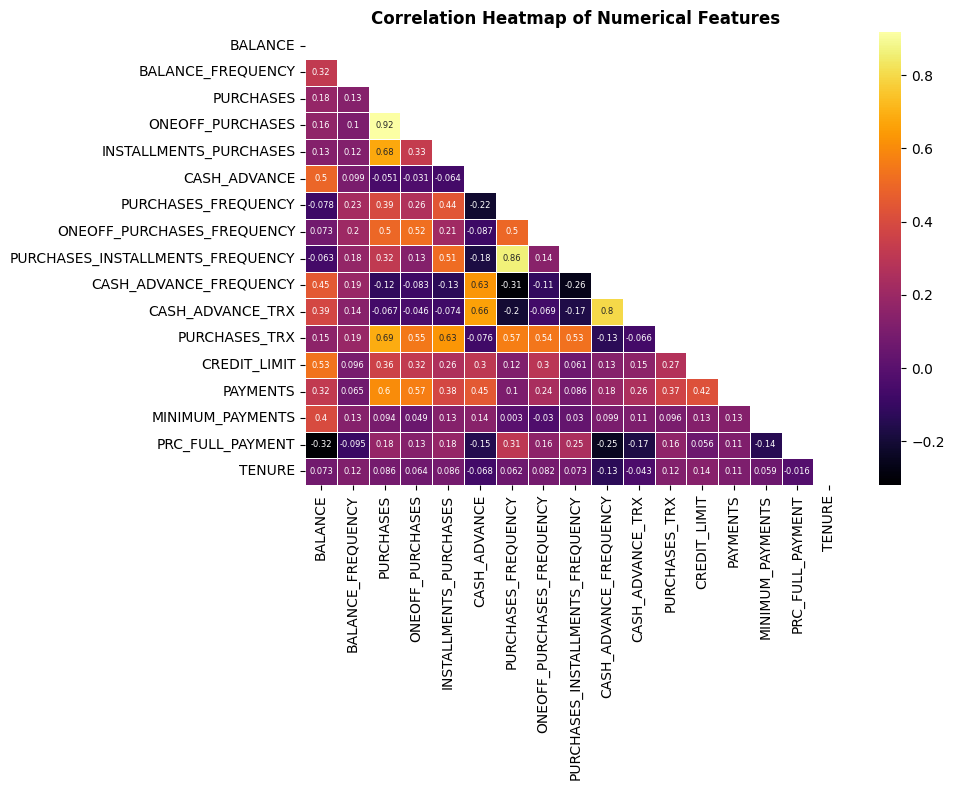

In [72]:
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='inferno', linewidths=0.5, annot_kws={"size":6})
plt.title('Correlation Heatmap of Numerical Features', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

Grafik tersebut merupakan *correlation heatmap* yang menggambarkan hubungan linier antar fitur numerik dalam sebuah dataset. Warna pada heatmap menunjukkan kekuatan dan arah korelasi antara dua variabel, di mana warna yang lebih terang (kuning) menunjukkan korelasi positif yang kuat, sedangkan warna yang lebih gelap (ungu atau hitam) menunjukkan korelasi yang lemah atau bahkan negatif. Nilai-nilai dalam kotak merepresentasikan koefisien korelasi Pearson antara pasangan variabel tersebut. Dari grafik ini terlihat bahwa beberapa variabel memiliki hubungan yang sangat kuat, seperti `ONEOFF_PURCHASES` dengan `PURCHASES` (0.92), yang menunjukkan bahwa pembelian satu kali memiliki kontribusi besar terhadap total pembelian. Korelasi tinggi juga terlihat antara `PURCHASES_INSTALLMENTS_FREQUENCY` dan `INSTALLMENTS_PURCHASES` (0.86), serta antara `CASH_ADVANCE_TRX` dan `CASH_ADVANCE_FREQUENCY` (0.80). Sementara itu, terdapat pula korelasi negatif, misalnya antara `PRC_FULL_PAYMENT` dan `BALANCE` (-0.32), yang mengindikasikan bahwa semakin sering pembayaran penuh dilakukan, maka saldo utang cenderung lebih kecil. Heatmap ini sangat berguna dalam proses analisis data karena dapat membantu dalam pemilihan fitur serta memahami struktur dan hubungan antar variabel sebelum dilakukan modeling lebih lanjut.

#### B. Credit Limit vs. Balance based on Tenure

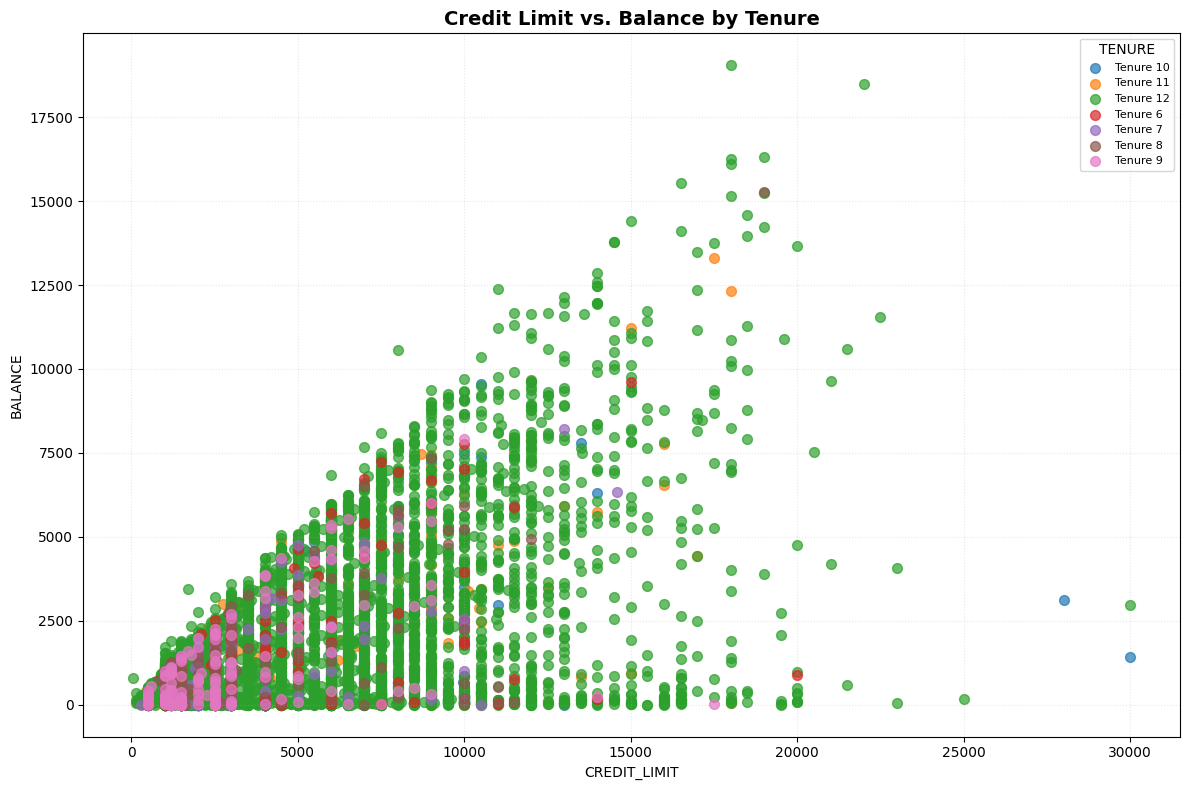

In [73]:
eda1 = df[['CREDIT_LIMIT', 'BALANCE', 'TENURE']].copy()
eda1['TENURE'] = eda1['TENURE'].astype(str)
tenure_list = sorted(eda1['TENURE'].unique())

plt.figure(figsize=(12, 8))
for tenure in tenure_list:
    subset = eda1[eda1['TENURE'] == tenure]
    plt.scatter(subset['CREDIT_LIMIT'], subset['BALANCE'], label=f'Tenure {tenure}', s=50, alpha=0.7)

plt.title('Credit Limit vs. Balance by Tenure', fontsize=14, fontweight='bold')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('BALANCE')
plt.legend(title='TENURE', fontsize=8)
plt.grid(True, linestyle='dotted', alpha=0.3)
plt.tight_layout()
plt.show()

Grafik tersebut merupakan scatter plot yang menunjukkan hubungan antara **Credit Limit** (batas kredit) dan **Balance** (saldo) dengan pewarnaan berdasarkan **Tenure** (lama menjadi nasabah). Setiap titik mewakili satu nasabah, dengan posisi horizontal menunjukkan batas kredit yang dimiliki dan posisi vertikal menunjukkan saldo yang tersisa.

Secara umum, terlihat adanya kecenderungan positif bahwa semakin tinggi batas kredit, semakin besar pula saldo yang dimiliki oleh nasabah. Namun, hubungan ini tidak bersifat linier sempurna karena terdapat banyak variasi saldo untuk setiap tingkat batas kredit. Warna-warna yang mewakili berbagai nilai tenure tersebar merata, menandakan bahwa lama menjadi nasabah (tenure) tidak menunjukkan pola yang signifikan terhadap hubungan antara credit limit dan balance. Grafik ini memberikan gambaran bahwa batas kredit cenderung menjadi faktor yang lebih dominan dalam menentukan saldo dibandingkan dengan lamanya seseorang menjadi nasabah.

#### C. Purchases Amount vs. Total Transaction

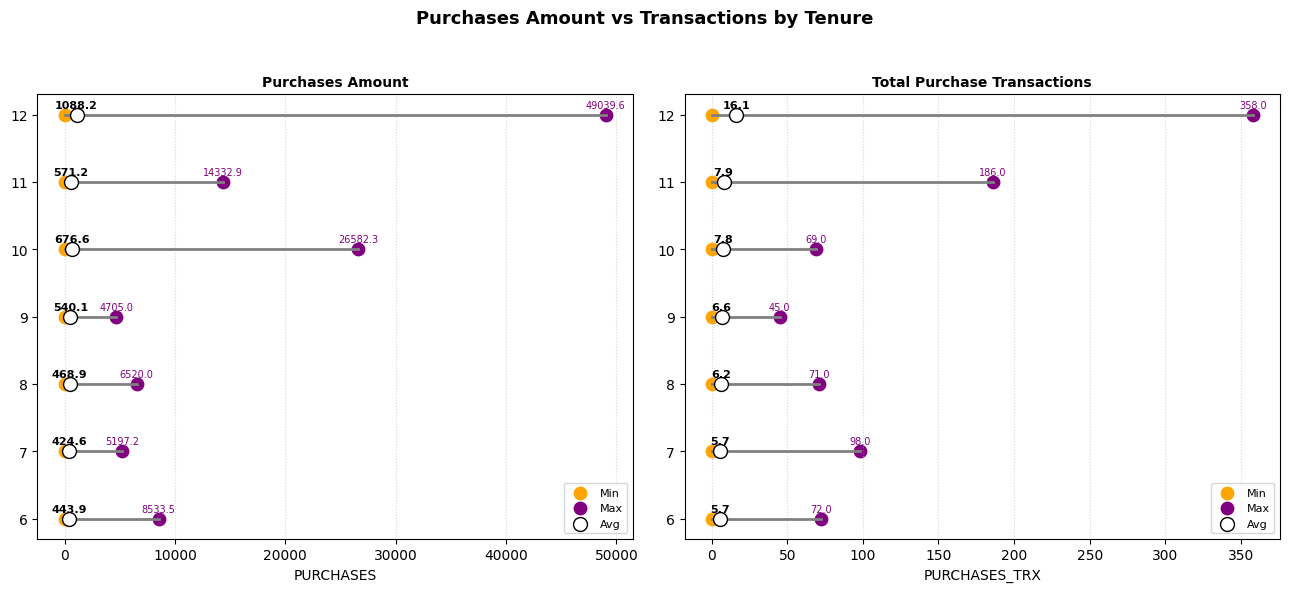

In [74]:
eda_purchases = df[['PURCHASES', 'TENURE']].groupby('TENURE').agg(
    MIN=('PURCHASES', 'min'),
    AVG=('PURCHASES', 'mean'),
    MAX=('PURCHASES', 'max')
).reset_index()

eda_trx = df[['PURCHASES_TRX', 'TENURE']].groupby('TENURE').agg(
    MIN=('PURCHASES_TRX', 'min'),
    AVG=('PURCHASES_TRX', 'mean'),
    MAX=('PURCHASES_TRX', 'max')
).reset_index()

def plot_dumbbell_with_labels(ax, data, x_label, title):
    for _, row in data.iterrows():
        y = row['TENURE']
        ax.plot([row['MIN'], row['MAX']], [y, y], color='gray', linewidth=2)
        ax.scatter(row['MIN'], y, color='orange', s=80, label='Min' if _ == 0 else "")
        ax.scatter(row['MAX'], y, color='purple', s=80, label='Max' if _ == 0 else "")
        ax.scatter(row['AVG'], y, color='white', edgecolor='black', s=100, zorder=5, label='Avg' if _ == 0 else "")
        ax.annotate(f"{row['AVG']:.1f}", (row['AVG'], y + 0.1), fontsize=8, fontweight='bold', ha='center')
        ax.annotate(f"{row['MAX']:.1f}", (row['MAX'], y + 0.1), fontsize=7, ha='center', color='purple')
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.set_xlabel(x_label)
    ax.set_yticks(data['TENURE'])
    ax.grid(True, axis='x', linestyle='dotted', alpha=0.5)
    ax.legend(fontsize=8)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Purchases Amount vs Transactions by Tenure', fontsize=13, fontweight='bold')

plot_dumbbell_with_labels(ax1, eda_purchases, 'PURCHASES', 'Purchases Amount')
plot_dumbbell_with_labels(ax2, eda_trx, 'PURCHASES_TRX', 'Total Purchase Transactions')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Gambar tersebut terdiri dari dua grafik horizontal yang membandingkan **jumlah pembelian (Purchases Amount)** dan **jumlah transaksi pembelian (Total Purchase Transactions)** berdasarkan **Tenure** atau lamanya seseorang menjadi nasabah.

Pada grafik sebelah kiri, terlihat bahwa nilai maksimum *Purchases Amount* secara signifikan lebih tinggi pada nasabah dengan tenure 12 tahun, yaitu mencapai hampir 50.000, sementara nilai rata-rata dan minimum cenderung rendah di semua tingkat tenure. Hal ini menunjukkan bahwa meskipun ada nasabah dengan pengeluaran sangat besar, sebagian besar nasabah memiliki pengeluaran yang jauh lebih rendah.

Grafik sebelah kanan menunjukkan pola serupa pada jumlah transaksi, di mana nasabah dengan tenure 12 juga memiliki jumlah transaksi tertinggi (maksimum hingga 358 transaksi), sementara rata-rata transaksi tetap berada di kisaran rendah untuk semua kelompok tenure. Pola ini mengindikasikan bahwa terdapat beberapa nasabah aktif dengan frekuensi transaksi dan jumlah pembelian yang tinggi, namun secara umum, mayoritas nasabah memiliki aktivitas pembelian yang rendah dan relatif merata antar kelompok tenure.

Secara keseluruhan, kedua grafik menunjukkan bahwa *tenure* tidak selalu berkorelasi kuat dengan tingginya pembelian atau transaksi, meskipun nasabah dengan tenure lebih panjang dapat menunjukkan outlier dengan aktivitas yang jauh lebih besar.

#### D. Credit Limit vs. Installment Purchases

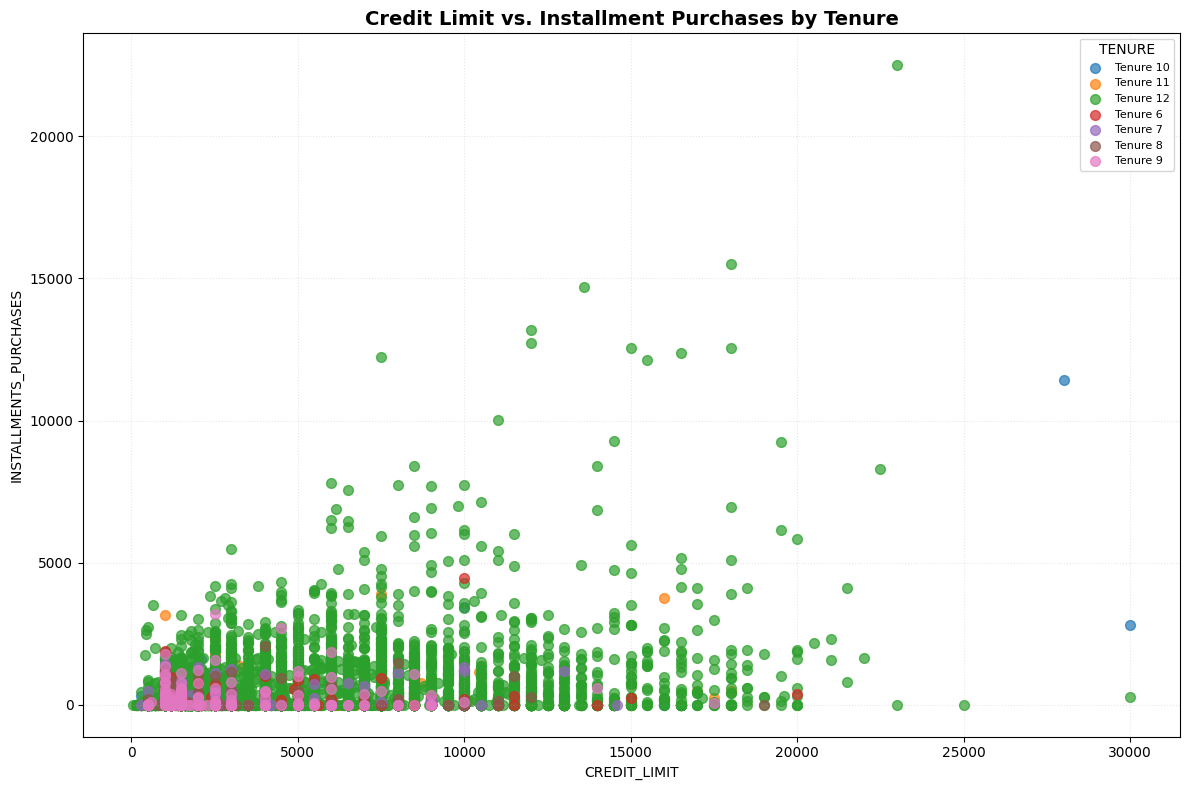

In [75]:
eda1 = df[['CREDIT_LIMIT', 'INSTALLMENTS_PURCHASES', 'TENURE']].copy()
eda1['TENURE'] = eda1['TENURE'].astype(str)

plt.figure(figsize=(12, 8))
for tnr, grp in eda1.groupby('TENURE'):
    plt.scatter(grp['CREDIT_LIMIT'], grp['INSTALLMENTS_PURCHASES'], label=f'Tenure {tnr}', s=50, alpha=0.7)

plt.title('Credit Limit vs. Installment Purchases by Tenure', fontsize=14, fontweight='bold')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('INSTALLMENTS_PURCHASES')
plt.legend(title='TENURE', fontsize=8)
plt.grid(True, linestyle='dotted', alpha=0.3)
plt.tight_layout()
plt.show()

Grafik tersebut menunjukkan hubungan antara **Credit Limit** dan **Installment Purchases** yang dikelompokkan berdasarkan **Tenure** atau lama menjadi nasabah. Secara umum, terlihat bahwa sebagian besar data terkonsentrasi pada nasabah dengan limit kredit di bawah 15.000 dan nilai pembelian cicilan yang juga relatif rendah (kurang dari 5.000).

Meskipun terdapat beberapa outlier dengan pembelian cicilan sangat tinggi (di atas 20.000), grafik ini tidak menunjukkan pola korelasi yang kuat antara besar limit kredit dan jumlah pembelian cicilan. Artinya, meskipun seseorang memiliki limit kredit yang besar, hal tersebut tidak selalu diikuti oleh tingginya penggunaan pembelian dengan cicilan.

Distribusi warna tenure menunjukkan bahwa semua kelompok tenure memiliki pola yang mirip, dan tidak ada satu kelompok tenure pun yang secara signifikan lebih dominan dalam melakukan pembelian cicilan tinggi. Hal ini mengindikasikan bahwa durasi menjadi nasabah (tenure) tidak berpengaruh besar terhadap kecenderungan untuk menggunakan fitur cicilan dalam bertransaksi.


## **2. Preprocessing Data**

### Dropping Variables

In [76]:
df = df.drop(['CUST_ID'], axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Missing Value Elimination

In [77]:
# Nilai yang hilang pada kolom 'CREDIT_LIMIT' (kolom ini memiliki satu nilai yang hilang)
nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[nulls_value]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [78]:
# Menghapus baris ke-5203 karena memiliki nilai yang hilang pada 'CREDIT_LIMIT'
df.drop([5203], axis=0, inplace=True)
df.reset_index( inplace = True)
df.drop('index', axis=1, inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [79]:
# Kolom MINIMUM_PAYMENTS memiliki banyak nilai yang hilang, jadi perlu dicari solusi untuk mengisinya
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8918,0.000000,NaN
8928,0.000000,NaN
8934,0.000000,NaN
8943,0.000000,NaN


Nilai nol harus digunakan untuk sel di kolom MINIMUM_PAYMENTS bagi mereka yang tidak melakukan pembayaran, yaitu ketika nilai PAYMENTS = 0, maka MINIMUM_PAYMENTS juga harus diisi dengan nilai 0.

In [80]:
# Terdapat beberapa baris di mana nilai PAYMENTS lebih kecil dari MINIMUM_PAYMENTS
print('Ukuran:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].shape)
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])]

Ukuran: (2364, 2)


,PAYMENTS,MINIMUM_PAYMENTS
2,622.066742,627.284787
5,1400.057770,2407.246035
10,1083.301007,2172.697765
14,805.647974,989.962866
15,1993.439277,2109.906490
...,...,...
8932,106.138603,337.294767
8938,72.530037,110.950798
8946,81.270775,82.418369
8947,52.549959,55.755628


Untuk mengisi nilai yang hilang pada kolom MINIMUM\_PAYMENTS, langkah-langkah yang dilakukan adalah sebagai berikut:

* Jika nilai PAYMENTS adalah 0, maka kita isi dengan nilai 0 pada MINIMUM\_PAYMENTS.
* Jika nilai PAYMENTS berada di antara 0 dan PAYMENTS\_MEAN, kita gunakan nilai PAYMENTS tersebut.
* Jika tidak, kita gunakan nilai PAYMENTS\_MEAN.

Metode ini dianggap benar karena ada 2358 baris dalam dataset di mana nilai PAYMENTS lebih kecil dari MINIMUM\_PAYMENTS, sehingga data itu sendiri telah memberikan izin untuk menggunakan pendekatan ini.

In [81]:
# Membuat salinan dari kolom 'MINIMUM_PAYMENTS'
minpay = df['MINIMUM_PAYMENTS'].copy()
# Menghitung nilai rata-rata dari kolom 'PAYMENTS'
payments_mean = np.mean(df['PAYMENTS'])

# Mengisi nilai hilang pada 'MINIMUM_PAYMENTS' berdasarkan kondisi pada kolom 'PAYMENTS'
i = 0
for payments, minpayments in zip(df['PAYMENTS'], df['MINIMUM_PAYMENTS'].isna()):
    if (payments == 0) and (minpayments == True):
        minpay[i] = 0
    elif (0 < payments < payments_mean) and (minpayments == True):
        minpay[i] = payments
    elif minpayments == True:
        minpay[i] = payments_mean
    i += 1

# Menampilkan jumlah nilai hilang sebelum dan sesudah pengisian
print(f'Jumlah nilai hilang (sebelum): {df.isna().sum().sum()}')
print(f'Jumlah nilai hilang (sesudah): {minpay.isna().sum().sum()}')

# Memperbarui kolom 'MINIMUM_PAYMENTS' dengan data yang sudah diperbaiki
df['MINIMUM_PAYMENTS'] = minpay.copy()

Jumlah nilai hilang (sebelum): 313
Jumlah nilai hilang (sesudah): 0


### Noise Data Elimination

#### Noise Detection

In [82]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df_count_out

,count_out
BALANCE,695
BALANCE_FREQUENCY,1492
PURCHASES,808
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,782
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


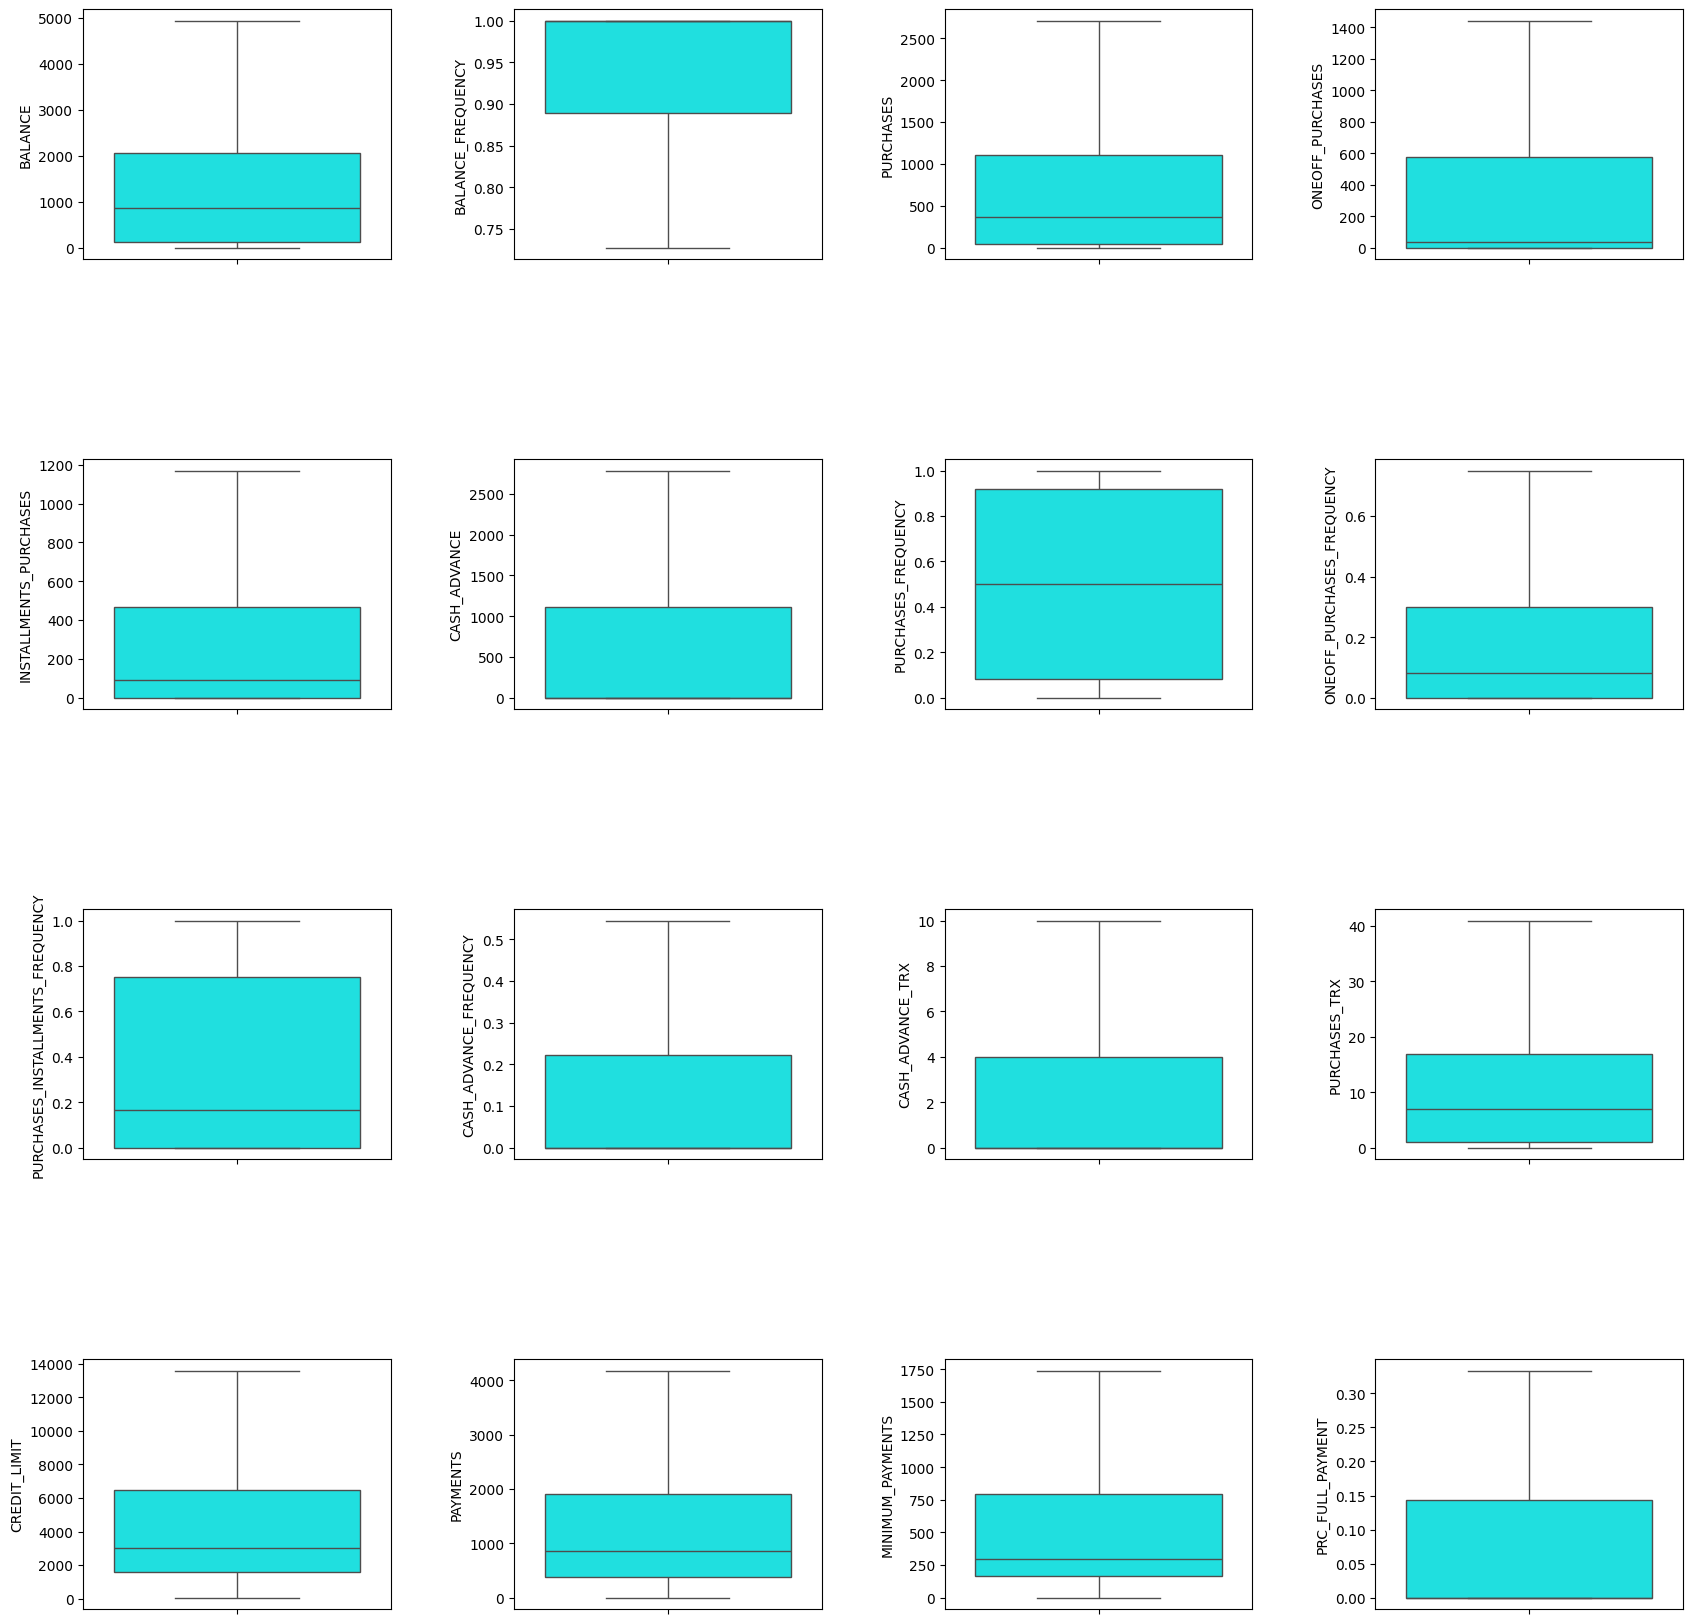

In [83]:
plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df.columns)-1):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]],showfliers = False ,color='aqua')

Seperti yang kita lihat, terdapat banyak outlier berdasarkan definisi. Namun, menghapusnya tidak disarankan. Hambatan ini sebaiknya diselesaikan dengan metode lain.

#### Noise Elimination

In [85]:
 #Dropping some of outliers
df = df[(df['BALANCE']<15000)]
df = df[(df['PURCHASES']<40000)]
df = df[(df['ONEOFF_PURCHASES']<30000)]
df = df[(df['INSTALLMENTS_PURCHASES']<20000)]
df = df[(df['CASH_ADVANCE']<40000)]
df = df[(df['MINIMUM_PAYMENTS']<60000)]

df.reset_index(inplace=True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8927,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,275.861322,0.000000,6
8928,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8929,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## **3. Processing Data**

### K-Means Clustering

In [88]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#### Elbow Method

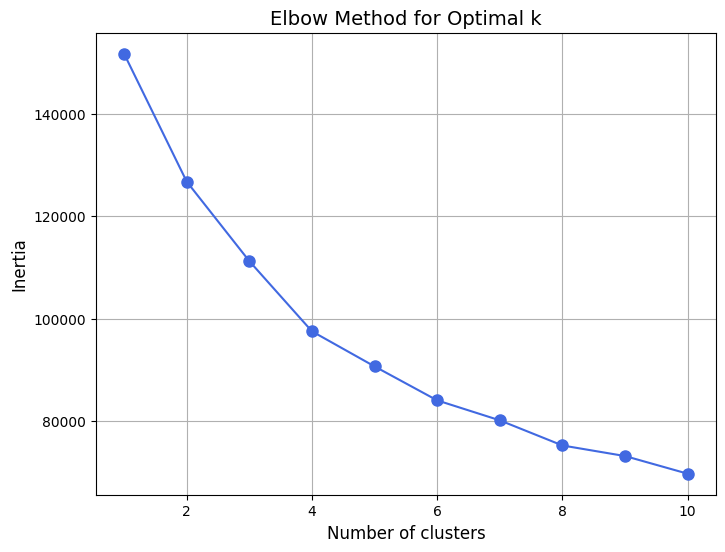

In [89]:
def plot_elbow_method(scaled_data):
    inertia = [KMeans(n_clusters=k, random_state=0).fit(scaled_data).inertia_ for k in range(1, 11)]
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertia, 'bo-', markersize=8, color='royalblue')
    plt.xlabel('Number of clusters', fontsize=12)
    plt.ylabel('Inertia', fontsize=12)
    plt.title('Elbow Method for Optimal k', fontsize=14)
    plt.grid(True)
    plt.show()

plot_elbow_method(scaled_data)

Grafik tersebut merupakan hasil dari metode Elbow yang digunakan untuk menentukan jumlah klaster (k) yang optimal dalam algoritma K-Means Clustering. Sumbu horizontal menunjukkan jumlah klaster yang dicoba (dari 1 hingga 10), sementara sumbu vertikal menunjukkan nilai inertia, yaitu jumlah kuadrat jarak antar data ke pusat klasternya (semakin kecil lebih baik).

Dari grafik tampak bahwa penurunan inertia paling tajam terjadi antara k = 1 hingga k = 4, kemudian penurunannya melambat. "Titik siku" atau elbow terlihat jelas di k = 4, yang menunjukkan bahwa jumlah klaster optimal adalah 4. Setelah titik ini, penurunan inertia menjadi lebih kecil, artinya menambah jumlah klaster setelah k = 4 memberikan peningkatan yang tidak signifikan terhadap akurasi pemodelan. Oleh karena itu, k = 4 dianggap sebagai pilihan yang efisien dan efektif untuk jumlah klaster.

#### Silhouette Score

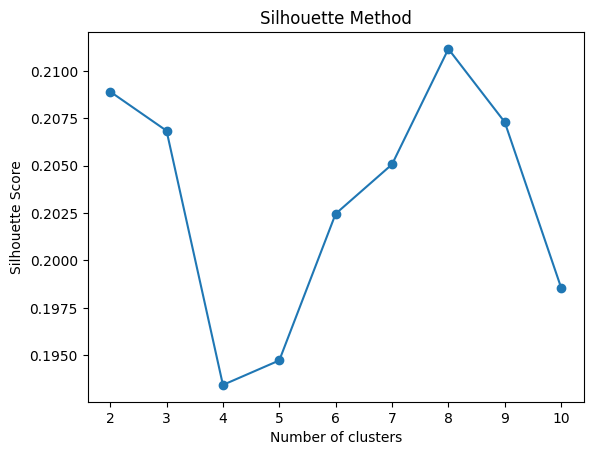

In [90]:
silhouette_scores = []
K = range(1, 11)
for k in K[1:]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(K[1:], silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

Grafik tersebut menunjukkan hasil Metode Silhouette yang digunakan untuk menentukan jumlah klaster optimal dalam K-Means Clustering. Sumbu horizontal menunjukkan jumlah klaster (k), sedangkan sumbu vertikal menunjukkan Silhouette Score, yaitu ukuran seberapa baik setiap titik data cocok dengan klasternya dibandingkan dengan klaster lain (semakin tinggi nilainya, semakin baik pemisahan antar klaster).

Dari grafik, terlihat bahwa nilai tertinggi dari Silhouette Score terjadi pada k = 8, yang berarti pada jumlah klaster ini, pemisahan antar kelompok paling optimal dibanding nilai k lainnya. Oleh karena itu, berdasarkan metode ini, jumlah klaster terbaik adalah 8, karena memberikan kualitas klasterisasi yang paling baik berdasarkan kedekatan internal dan pemisahan antar klaster.

#### Clustering Akhir (K=4)

In [91]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)
df_finalresult = pd.DataFrame(df)
df_finalresult['kmeans_cluster'] = clusters

inertia = kmeans.inertia_
print(f"K-Means Inertia for {optimal_k} clusters: {inertia}")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

K-Means Inertia for 4 clusters: 97496.23213813882


#### Visualisasi PCA

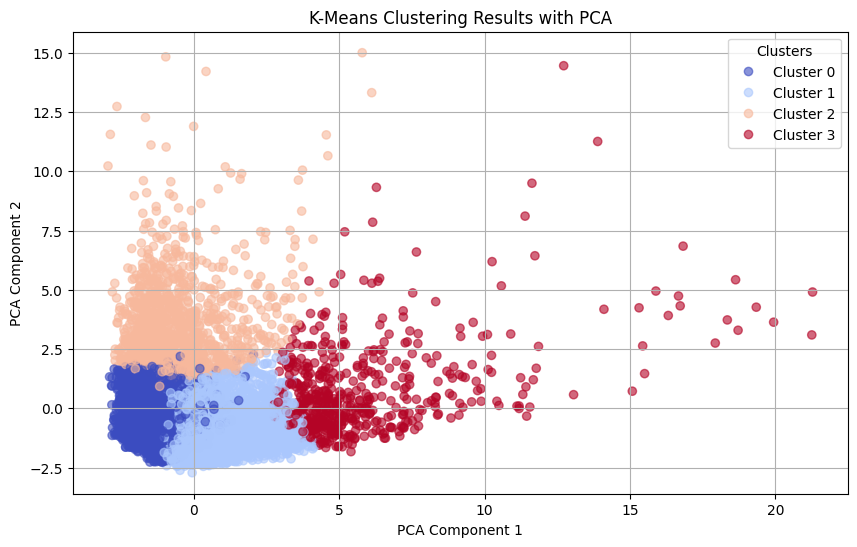

In [92]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results with PCA')
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

Grafik tersebut menunjukkan hasil K-Means Clustering yang divisualisasikan menggunakan PCA (Principal Component Analysis) untuk mereduksi dimensi data menjadi dua komponen utama (PCA Component 1 dan 2). Setiap titik mewakili satu pelanggan, dan warnanya menunjukkan klaster tempat pelanggan tersebut dikelompokkan.

Dalam visualisasi ini terdapat 4 klaster (Cluster 0–3) yang masing-masing terpisah cukup jelas di ruang dua dimensi. Ini menunjukkan bahwa proses klasterisasi berhasil mengelompokkan data ke dalam kelompok yang relatif berbeda berdasarkan pola fitur yang dimiliki. Klaster terlihat memiliki konsentrasi yang cukup baik, meskipun ada beberapa tumpang tindih antara area klaster, khususnya antara Cluster 0 dan Cluster 1.

#### Analisis Tiap Cluster

In [97]:
cluster_df = pd.DataFrame(df)
cluster_df['clusters'] = clusters
fitur = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
         'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
         'TENURE']
cluster_df.groupby('clusters')[fitur].mean().round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,993.90,0.79,268.83,210.11,58.99,579.46,0.17,0.09,0.08,0.11,2.10,2.88,3259.93,962.90,511.82,0.08,11.44
1,850.99,0.93,1131.95,514.04,618.19,201.63,0.88,0.28,0.71,0.04,0.78,20.91,4061.87,1239.98,630.88,0.27,11.58
2,4490.27,0.97,471.38,301.03,170.43,4404.86,0.28,0.13,0.18,0.48,13.92,7.01,7390.28,3388.41,1996.14,0.04,11.40
3,3042.61,0.99,6334.03,4189.63,2145.53,685.56,0.95,0.74,0.78,0.07,2.07,78.45,9110.67,6105.07,1457.05,0.29,11.95


Berdasarkan hasil K-Means Clustering dengan 4 cluster, berikut adalah hasil analisis untuk masing-masing cluster berdasarkan perilaku pengguna kartu kredit:

**A. Cluster 0 – Pasif & Pembeli Sesekali**\
Statistik Kunci:
* Saldo rendah: balance = 993.9
* Frekuensi saldo moderat: 0.79
* Jumlah pembelian rendah: 268.83
* Pembelian dominan dalam sekali transaksi: oneoff_purchases = 210.11
* Cash advance sedang: 579.46
* Frekuensi pembelian sangat rendah: 0.17
* Persentase pembayaran penuh rendah: 0.08
* Tenure hampir 1 tahun: 11.44 bulan

Pengguna dalam klaster ini tidak terlalu aktif. Mereka jarang bertransaksi dan jarang memperbarui saldo. Pembelian dilakukan sesekali dalam jumlah besar (one-off), menunjukkan perilaku yang sporadis. Meskipun cash advance dilakukan, transaksinya masih sedikit. Persentase pembayaran penuh juga rendah.

**B. Cluster 1 – "Pengguna Aktif & Disiplin Finansial"**\
Statistik Kunci:
* Saldo menengah: 850.99
* Frekuensi saldo tinggi: 0.93
* Pembelian tinggi: 1131.95
* Cicilan dan one-off seimbang
* Cash advance rendah: 201.63
* Frekuensi pembelian tinggi: 0.88
* Pembayaran tinggi: 1239.98
* Pembayaran minimum juga cukup: 630.88
* Persentase pembayaran penuh baik: 0.27

Pengguna dalam klaster ini adalah tipe pengguna yang aktif bertransaksi tetapi masih bertanggung jawab dalam pembayaran. Pembelian dilakukan cukup sering baik dalam bentuk sekali beli maupun cicilan. Jarang menggunakan cash advance dan melakukan pembayaran dengan cukup disiplin.

**C. Cluster 2 – "Penarik Tunai Intensif"**\
Statistik Kunci:
* Saldo sangat tinggi: 4490.27
* Cash advance sangat tinggi: 4404.86
* Pembelian rendah: 471.38
* Frekuensi cash advance tinggi: 0.48
* Transaksi pembelian jarang: 7.01 trx
* Pembayaran tinggi: 3388.41
* Pembayaran minimum besar: 1996.14
* Persentase pembayaran penuh sangat rendah: 0.04

Pengguna dalam klaster ini sangat sering dan besar dalam mengambil cash advance, namun tidak terlalu aktif dalam pembelian. Frekuensi pembelian rendah dan lebih memilih tarik tunai. Meskipun mereka membayar dalam jumlah besar, jarang membayar penuh.

**D. Cluster 3 – "High Spender yang Stabil"**\
Statistik Kunci:
* Saldo tinggi: 3042.61
* Pembelian sangat tinggi: 6334.03
* Pembelian one-off dan cicilan sangat besar
* Frekuensi transaksi sangat tinggi: 78.45 transaksi pembelian
* Cash advance cukup besar: 685.56
* Frekuensi cash advance rendah: 0.07
* Limit sangat tinggi: 9110.67
* Pembayaran besar: 6105.07
* Persentase pembayaran penuh moderat: 0.29

Pengguna dalam kluster ini sangat aktif dan memiliki limit besar. Mereka melakukan banyak pembelian (baik one-off maupun cicilan) dan sering membayar tagihan. Mereka masih cukup bertanggung jawab, meskipun tidak selalu membayar penuh.

### Hierarchical Clustering

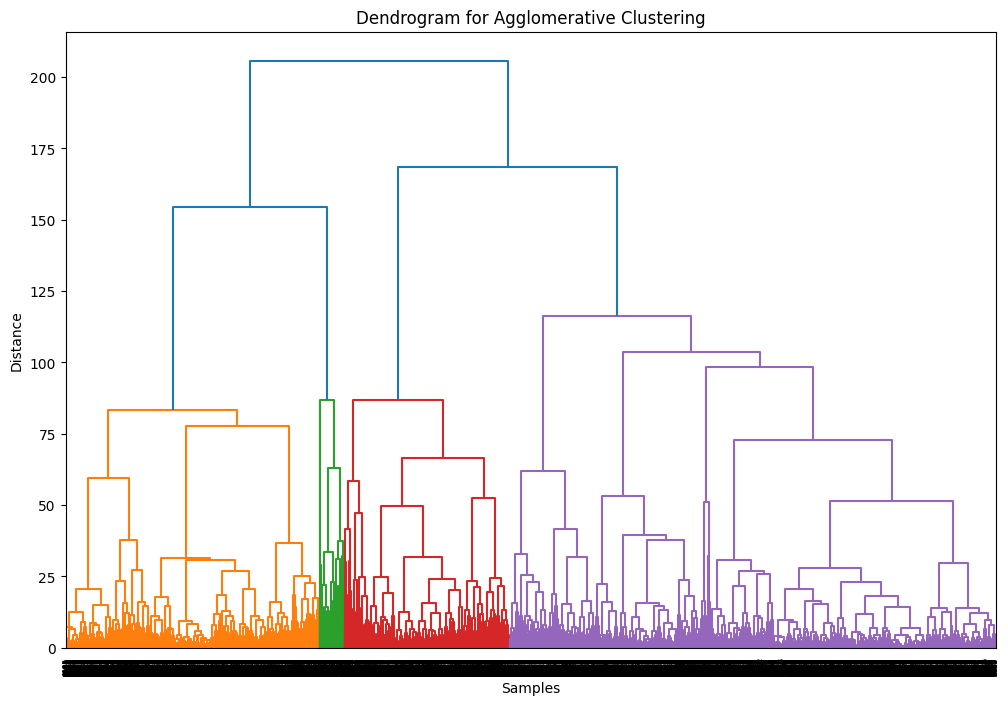

In [94]:
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Grafik tersebut merupakan dendrogram hasil dari Agglomerative Clustering, yang menunjukkan proses penggabungan data secara hierarkis dari bawah ke atas.

Setiap garis horizontal mewakili penggabungan dua klaster, dan sumbu vertikal menunjukkan jarak atau dissimilarity antara klaster yang digabung. Semakin tinggi garis horizontal, semakin besar jarak antara klaster yang digabung. Dengan melihat “titik potong” secara horizontal (misalnya pada ketinggian sekitar 150–175), kita bisa memperkirakan jumlah klaster yang optimal — dalam grafik ini, sekitar 3 hingga 4 klaster terlihat sebagai pilihan yang wajar sebelum jarak antar klaster meningkat tajam.

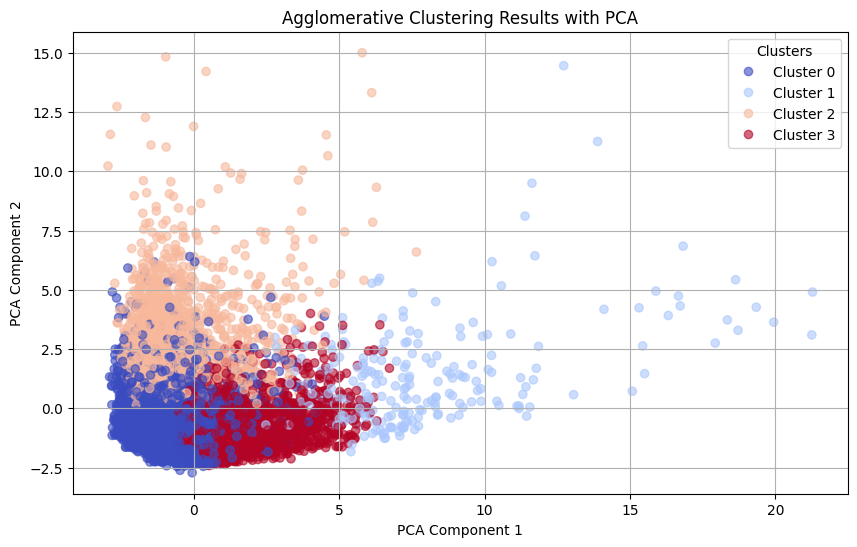

In [95]:
n_clusters = 4
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(scaled_data)
df_finalresult = pd.DataFrame(df)
df_finalresult['agg_cluster'] = agg_labels

#PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=agg_labels, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering Results with PCA')
legend_labels = [f'Cluster {i}' for i in range(n_clusters)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

Grafik tersebut menunjukkan hasil Agglomerative Clustering yang divisualisasikan menggunakan PCA (Principal Component Analysis) ke dalam dua dimensi.

Setiap titik mewakili satu data, dan warnanya menunjukkan klaster yang terbentuk (Cluster 0–3). Dari penyebaran dan pembagian warna, terlihat bahwa algoritma berhasil mengelompokkan data ke dalam empat klaster yang cukup terpisah meskipun terdapat sedikit tumpang tindih di beberapa area, terutama di pusat distribusi data.

In [96]:
agg_cluster_df = pd.DataFrame(df)
agg_cluster_df['clusters'] = agg_labels
agg_cluster_df.groupby('clusters')[fitur].mean().round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,913.97,0.79,421.75,294.28,127.84,493.65,0.32,0.14,0.18,0.09,1.67,5.75,3273.31,847.72,710.65,0.12,11.17
1,3548.91,0.98,8873.30,6089.40,2786.40,703.25,0.92,0.74,0.71,0.07,1.97,98.57,9679.38,8273.11,1868.20,0.34,11.95
2,3868.94,0.96,463.36,284.48,178.96,3565.89,0.24,0.12,0.16,0.41,11.86,6.97,6813.04,3268.83,1364.60,0.04,11.82
3,1039.41,0.98,1585.28,744.96,840.40,229.18,0.92,0.32,0.80,0.04,0.75,28.01,4718.32,1678.53,554.54,0.28,11.95


Berikut adalah analisis hasil Hierarchical Clustering yang membentuk 4 klaster berdasarkan pola penggunaan kartu kredit, berikut adalah hasil analisis untuk masing-masing cluster berdasarkan perilaku pengguna kartu kredit:

**A. Cluster 0 – Pengguna Umum & Moderat**\
Statistik Kunci:
* Saldo rendah: 913.97
* Frekuensi saldo sedang: 0.79
* Pembelian moderat: 421.75
* One-off pembelian dominan: 294.28
* Cash advance sedang: 493.65
* Frekuensi pembelian rendah: 0.32
* Frekuensi cash advance rendah: 0.09
* Jumlah transaksi kecil: 5.75
* Persentase pembayaran penuh rendah: 0.12

Pengguna dalam klaster ini melakukan pembelian moderat, lebih condong ke pembelian langsung daripada cicilan. Jumlah transaksi dan penggunaan tunai tergolong rendah. Mereka tampak sebagai pengguna biasa dengan perilaku konservatif dan frekuensi transaksi rendah.

**B. Cluster 1 – "Big Spender Bertanggung Jawab"**\
Statistik Kunci:
* Saldo tinggi: 3548.91
* Pembelian sangat tinggi: 8873.3
* One-off dan cicilan besar: >6000 dan >2700
* Cash advance cukup rendah: 703.25
* Frekuensi pembelian tinggi: 0.92
* Frekuensi cash advance sangat rendah: 0.07
* Jumlah transaksi pembelian sangat tinggi: 98.57
* Pembayaran sangat tinggi: 8273.11
* Pembayaran penuh cukup baik: 0.34

Pengguna dalam klaster ini sangat aktif dan berbelanja dalam jumlah besar, namun jarang menggunakan cash advance. Mereka juga melakukan pembayaran dalam jumlah besar, dengan tingkat pembayaran penuh yang cukup baik. Ini menunjukkan mereka memiliki kontrol finansial yang baik meskipun pengeluaran tinggi.

**C. Cluster 2 – "Pengguna Dominan Tarik Tunai"**\
Statistik Kunci:
* Saldo tinggi: 3868.94
* Pembelian rendah: 463.36
* Cash advance sangat tinggi: 3565.89
* Frekuensi cash advance tinggi: 0.41
* Transaksi tunai tinggi: 11.86
* Frekuensi pembelian rendah: 0.24
* Persentase pembayaran penuh sangat rendah: 0.04

Pengguna dalam klaster ini memiliki kebiasaan menarik uang tunai dalam jumlah besar dan cukup sering, sementara pembelian kartu sangat rendah. Ini bisa menjadi indikator risiko, terutama karena pembayaran penuh sangat jarang dilakukan. Perilaku ini menunjukkan ketergantungan pada fitur tarik tunai.

**D. Cluster 3 – "Pengguna Aktif & Seimbang"**\
Statistik Kunci:
* Saldo rendah-sedang: 1039.41
* Pembelian tinggi: 1585.28
* Pembelian one-off dan cicilan seimbang: ~744 vs ~840
* Cash advance rendah: 229.18
* Frekuensi pembelian tinggi: 0.92
* Frekuensi cash advance sangat rendah: 0.04
* Transaksi sedang: 28.01
* Pembayaran sedang: 1678.53
* Pembayaran penuh cukup baik: 0.28

Pengguna dalam klaster ini aktif melakukan pembelian baik secara langsung maupun cicilan. Jarang menggunakan cash advance dan memiliki perilaku pembayaran yang cukup sehat. Mereka tampak sebagai pengguna aktif namun konservatif terhadap fitur tarik tunai.